In [54]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd

import os
import numpy as np
from pprint import pprint 
import matplotlib.pyplot as plt
import random
import acquire as a
import nltk
import re

In [2]:
user_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36",
    "Chrome/91.0.4472.124"
    # Add more User-Agent strings as needed
]

In [27]:
start_page = 1
end_page = 30
base_url = "https://github.com/search?o=desc&q=stars:%3E1&s=forks&type=Repositories"

links = []

# Iterate over each page
for page in range(start_page, end_page + 1):
    url = f"{base_url}&p={page}"
    headers = {"User-Agent": random.choice(user_agents)}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    repo_items = soup.find_all('li', class_='repo-list-item')

    for link in repo_items:
        links.append(link.a.attrs['href'])

# Print all the links
for link in links:
    pprint(link)
    print()
    

In [ ]:
repo_items = soup.find_all('li', class_='repo-list-item')
repo_items

In [4]:

start_page = 1
end_page = 20
base_url = "https://github.com/search?o=desc&q=stars:%3E1&s=forks&type=Repositories"

links = []

# Iterate over each page
for page in range(start_page, end_page + 1):
    url = f"{base_url}&p={page}"
    headers = {"User-Agent": random.choice(user_agents)}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    repo_items = soup.find_all('li', class_='repo-list-item')

    for link in repo_items:
        link_href = link.a.attrs['href'].lstrip('/')  # Remove forward slash at the beginning of the link
        links.append(link_href)

# Print all the links
for link in links:
    pprint(link)
    print()


'jtleek/datasharing'

'nightscout/cgm-remote-monitor'

'jackfrued/Python-100-Days'

'kubernetes/kubernetes'

'spring-projects/spring-framework'

'getify/You-Dont-Know-JS'

'freeCodeCamp/freeCodeCamp'

'qmk/qmk_firmware'

'DataScienceSpecialization/courses'

'Significant-Gravitas/Auto-GPT'

'barryclark/jekyll-now'

'bitcoin/bitcoin'

'trekhleb/javascript-algorithms'

'angular/angular.js'

'hiifeng/V2ray-for-Doprax'

'dotnet/AspNetCore.Docs'

'ohmyzsh/ohmyzsh'

'jenkins-docs/simple-java-maven-app'

'MicrosoftDocs/mslearn-tailspin-spacegame-web'

'ansible/ansible'

'Significant-Gravitas/Auto-GPT'

'trekhleb/javascript-algorithms'

'angular/angular.js'

'justjavac/free-programming-books-zh_CN'

'python/cpython'

'nodejs/node'

'sindresorhus/awesome'

'apache/dubbo'

'airbnb/javascript'

'atralice/Curso.Prep.Henry'

'ColorlibHQ/AdminLTE'

'luchihoratiu/debug-via-ssh'

'ethereum/go-ethereum'

'anuraghazra/github-readme-stats'

'helm/charts'

'linuxacademy/devops-essentials-sample-app'

'AUTO

In [5]:
len(links)

60

In [9]:
df=pd.read_json('data2.json')
df.head()

,repo,language,readme_contents
0,jtleek/datasharing,None,How to share data with a statistician\n=======...
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...
2,jackfrued/Python-100-Days,Python,## Python - 100天从新手到大师\n\n> **作者**：骆昊\n>\n> **...
3,kubernetes/kubernetes,Go,# Kubernetes (K8s)\n\n[![CII Best Practices](h...
4,spring-projects/spring-framework,Java,"# <img src=""framework-docs/src/docs/spring-fra..."


In [16]:
def clean(text: str) -> list: 
    """A simple function to cleanup text data"""
    
    #remove non-ascii characters & lower
    text = (text.encode('ascii', 'ignore')
                .decode('utf-8', 'ignore')
                .lower())
    
    #remove special characters
    words = re.sub(r'[^\w\s]', '', text).split()
    
    #build the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    #getting all stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [17]:
df['clean_readme_contents'] = df.readme_contents.apply(clean).apply(' '.join)

In [18]:
df.head()

,repo,language,readme_contents,clean_readme_contents
0,jtleek/datasharing,None,How to share data with a statistician\n=======...,share data statistician guide anyone need shar...
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...
2,jackfrued/Python-100-Days,Python,## Python - 100天从新手到大师\n\n> **作者**：骆昊\n>\n> **...,python 100 8w15pythoncore50courseshttpsgithubc...
3,kubernetes/kubernetes,Go,# Kubernetes (K8s)\n\n[![CII Best Practices](h...,kubernetes k8s cii best practiceshttpsbestprac...
4,spring-projects/spring-framework,Java,"# <img src=""framework-docs/src/docs/spring-fra...",img srcframeworkdocssrcdocsspringframeworkpng ...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   repo                   70 non-null     object
 1   language               63 non-null     object
 2   readme_contents        70 non-null     object
 3   clean_readme_contents  70 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


In [23]:
df.language.value_counts().nunique()

7

In [26]:
df.language.unique()

array([None, 'JavaScript', 'Python', 'Go', 'Java', 'TypeScript', 'C',
       'HTML', 'CSS', 'Dockerfile', 'C#', 'Dart', 'PHP', 'C++', 'Scala',
       'Rust', 'Shell', 'SCSS'], dtype=object)

In [42]:
(df['language'] == 'JavaScript').mean()*100

21.428571428571427

In [44]:
15/70

0.21428571428571427

In [47]:
languages_to_keep = ['JavaScript', 'Python', 'Java']
df['language'] = np.where(df['language'].isin(languages_to_keep), df['language'], 'Other')

In [48]:
df.head()

,repo,language,readme_contents,clean_readme_contents
0,jtleek/datasharing,Other,How to share data with a statistician\n=======...,share data statistician guide anyone need shar...
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...
2,jackfrued/Python-100-Days,Python,## Python - 100天从新手到大师\n\n> **作者**：骆昊\n>\n> **...,python 100 8w15pythoncore50courseshttpsgithubc...
3,kubernetes/kubernetes,Other,# Kubernetes (K8s)\n\n[![CII Best Practices](h...,kubernetes k8s cii best practiceshttpsbestprac...
4,spring-projects/spring-framework,Java,"# <img src=""framework-docs/src/docs/spring-fra...",img srcframeworkdocssrcdocsspringframeworkpng ...


In [49]:
df.language.value_counts()

Other         40
JavaScript    15
Python        10
Java           5
Name: language, dtype: int64

In [50]:
40/70

0.5714285714285714

In [51]:
def create_pie_chart(df, column_name,title):
    """ This function creates a pie chart for our categorical target variable"""
    values = df[column_name].value_counts()
    labels = values.index.tolist()
    sizes = values.tolist()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()
    

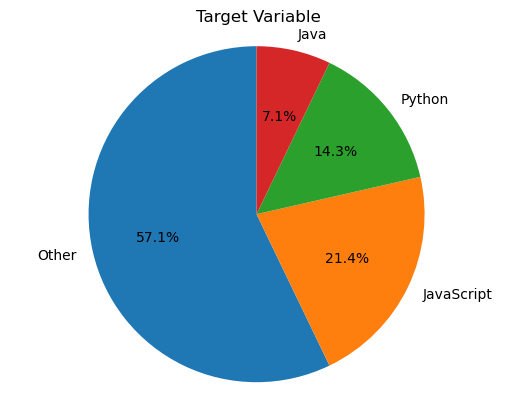

In [55]:
create_pie_chart(df,'language','Target Variable')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   repo                   70 non-null     object
 1   language               70 non-null     object
 2   readme_contents        70 non-null     object
 3   clean_readme_contents  70 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB
